In [ ]:
import re                                  # for text preprocessing
import pandas as pd                        # for data manipulation and analysis
import json                                # to load  jason file
import  numpy as np                        # to deal with mul
import matplotlib.pyplot as plt            # for visualization
import seaborn as sns                      # for visualization
from tabulate import tabulate              # to create tabels 
from ipywidgets import interact            # to make intractive functions 
pd.set_option('display.max_columns',30)    # to limit the number of rows displayed
from datetime import datetime              # for preprocessing the data for time-series analysis
import warnings 
warnings.filterwarnings('ignore')
#import mysql.connector as sql
from google.colab import drive # to access the drive files 
drive.mount('/content/drive')
%cd /content/drive/My Drive/Colab Notebooks
data_df=pd.read_csv('Clean_data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks


# **Natural Language Processing**

In [ ]:
import spacy 
from spacy.lang.en import English
! python -m spacy download en_core_web_lg
nlp=spacy.load('en_core_web_lg')

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-01-17 05:39:30.872473: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
data_df.drop(columns=['Unnamed: 0','index'],inplace=True)
data_df.head(2)

In [ ]:
import re
from spacy.lang.en.stop_words import STOP_WORDS
def Textclean(text):
  doc=nlp(text)
  vector=[]
  for i in doc:
    if (i.is_stop==False) and (i.is_punct==False) and (i.is_digit==False):
      if i not in STOP_WORDS:
        vector.append(i.lemma_)

  a=' '.join(vector)  
  a=re.sub(r'\d',' ',a) 
  a=re.sub(r'\W+',' ',a)
  a=re.sub('\s',' ',a)
  a=a.lower().strip()
  return a 

In [ ]:
def mostcommon(data_df,i,j):
  from collections import Counter
  counts= Counter()
  for i in data_df[i]:
    counts[i]+=1
  a=counts.most_common(j)
  return pd.DataFrame(a,columns=['Name','Count']) 

In [ ]:
text='hello yogesh @34 yadav wassup'
Textclean(text)

'hello yogesh yadav wassup'

In [ ]:
def vector(text):
  doc=nlp(text)
  return doc.vector

In [ ]:
text='hello yogesh yadav wassup'
a=vector(text)
a.shape

(300,)

In [ ]:
#data_df['reviewText']=data_df['reviewText'].apply(Textclean)

In [ ]:
data_df['reviewText'][0]

'work purpose get mark great durable afforable sandpaper pro grit cut fast evenly random deep scratch like see cheap paper didn t hint clog the adhesive need permanent go con none'

In [ ]:
#data_df['summary']=data_df['summary'].apply(Textclean)

In [ ]:
data_df['summary'][0]

'happy performance'

In [ ]:
#data_df['review']=data_df['reviewText']+' '+data_df['summary']

In [ ]:
#data_df['review']=data_df['review'].apply(Textclean)
data_df['review'][0]

'work purpose get mark great durable afforable sandpaper pro grit cut fast evenly random deep scratch like see cheap paper didn t hint clog the adhesive need permanent go con none happy performance'

In [ ]:
#data_df['vector']=data_df['review'].apply(vector)

In [ ]:
#data_df['vector'][0].shape

In [ ]:
data_df['Sentiments']=data_df['overall'].map({
    1:'Negative',
    2:'Negative',
    3:'Neutral',
    4:'Positive',
    5:'Positive'
})

In [ ]:
data_df['Sentiments'].value_counts()

Positive    60622
Negative     3974
Neutral      3965
Name: Sentiments, dtype: int64

,overall,verified,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,category,description,title,brand,rank,main_cat,price,pricee,review,vector,Sentiments
0,5,1,A1JB7HFWHRYHT7,B0000223SI,Alex W.,work purpose get mark great durable afforable ...,happy performance,2017-11-27,"Industrial & Scientific ,Abrasive & Finishing ...","Amazon.com This superior quality, clog- and lo...",PORTER-CABLE 740000801 4 1/2-Inch x 10yd 80 Gr...,PORTER-CABLE,19857.0,Tools & Home Improvement,15.99,2.771964,work purpose get mark great durable afforable ...,[-0.5264759 1.8836997 -2.5150156 0.578906...,Positive
1,5,1,A2FCLJG5GV8SD6,B0000223SI,Randall Harris,fast cutting good adheasive,good paper,2017-11-04,"Industrial & Scientific ,Abrasive & Finishing ...","Amazon.com This superior quality, clog- and lo...",PORTER-CABLE 740000801 4 1/2-Inch x 10yd 80 Gr...,PORTER-CABLE,19857.0,Tools & Home Improvement,15.99,2.771964,fast cutting good adheasive good paper,[-7.9007673e-01 -1.0104666e+00 -2.8361666e+00 ...,Positive


In [ ]:
#data_df.to_csv('Clean_data.csv',header=True,index=True)

In [ ]:
def sentanalysis(Sentiment='Positive',cat='Industrial & Scientific'):
  data_df4=data_df[(data_df['main_cat']==cat) & (data_df['Sentiments']==Sentiment)]
  a=mostcommon(data_df4,'brand',10)
  #display(a)
  a.plot(kind='bar',x = 'Name',rot=90)

interact(sentanalysis,Sentiment=['Positive','Negative','Neutral'],cat=[x for x in data_df['main_cat'].unique()]) ; 

interactive(children=(Dropdown(description='Sentiment', options=('Positive', 'Negative', 'Neutral'), value='Po…

# Sentimental Analysis - Classification

In [ ]:
import re                                  # for text preprocessing
import pandas as pd                        # for data manipulation and analysis
import json                                # to load  jason file
import  numpy as np                        # to deal with mul
import matplotlib.pyplot as plt            # for visualization
import seaborn as sns                      # for visualization
from tabulate import tabulate              # to create tabels 
from ipywidgets import interact            # to make intractive functions 
pd.set_option('display.max_columns',30)    # to limit the number of rows displayed
from datetime import datetime              # for preprocessing the data for time-series analysis
import warnings 
warnings.filterwarnings('ignore')
#import mysql.connector as sql
from google.colab import drive # to access the drive files 
drive.mount('/content/drive')
%cd /content/drive/My Drive/Colab Notebooks
data_df=pd.read_csv('Clean_data.csv')
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import plot_confusion_matrix,classification_report
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks


## Label Encoding 

In [ ]:
STOP_WORDS

In [ ]:
label=LabelEncoder()

data_df['N_sents']=label.fit_transform(data_df['Sentiments'])

## SMOTE 

### Because the classes are not equally spread thats why our model is not highly trained on other classes so we will use the SMOTE technique to increase the samples of the class which have less data.

In [ ]:
smote=SMOTE(sampling_strategy='auto')

In [ ]:
x=data_df['review']
y=data_df['N_sents']

In [ ]:
tfidf=TfidfVectorizer(max_features=20000)
a=tfidf.fit_transform(x)
a.toarray()
X, Y=smote.fit_resample(a,y)
x_train,x_test,y_train,y_test=train_test_split(X, Y,test_size=0.3,random_state=12)

# TFIDF

## MultinomialNB

The Accuracy of the model : 79.34017595307918 %

               precision    recall  f1-score   support

           0       0.86      0.82      0.84     19160
           1       0.77      0.75      0.76     18615
           2       0.75      0.82      0.78     16785

    accuracy                           0.79     54560
   macro avg       0.79      0.79      0.79     54560
weighted avg       0.80      0.79      0.79     54560



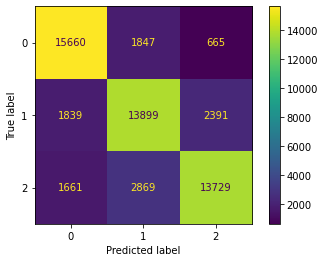

In [ ]:
model1=MultinomialNB()
model1.fit(x_train,y_train)
y_pred=model1.predict(x_test)
print('The Accuracy of the model :',accuracy_score(y_test,y_pred)*100,'%')

print('\n',classification_report(y_pred,y_test))
plot_confusion_matrix(model1,x_test,y_test);

In [ ]:
name=[]
score=[]
name.append('MultonomialNB')
score.append(model1.score(x_test,y_test))

Predicting on unknown data 

In [ ]:
text=["After a few days, there is a yellow color over the mouse rubber. I think rubber reacted with sweat. It doesn't look good now. And no way to clean it. So please go for dark color."]
test=tfidf.transform(text)
label.inverse_transform(np.unique(data_df['N_sents']))[model1.predict(test)]

array(['Neutral'], dtype=object)

## Logistic Regression

The Accuracy of the model : 83.96444281524926 %

               precision    recall  f1-score   support

           0       0.92      0.87      0.89     19215
           1       0.81      0.80      0.81     18544
           2       0.79      0.86      0.82     16801

    accuracy                           0.84     54560
   macro avg       0.84      0.84      0.84     54560
weighted avg       0.84      0.84      0.84     54560



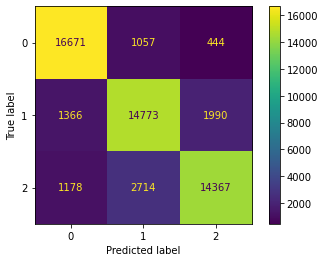

In [ ]:
modell=OneVsRestClassifier(LogisticRegression( ))
modell.fit(x_train,y_train)
y_pred=modell.predict(x_test)
print('The Accuracy of the model :',accuracy_score(y_test,y_pred)*100,'%')

print('\n',classification_report(y_pred,y_test))
plot_confusion_matrix(modell,x_test,y_test);

In [ ]:
name.append('LogisticRegression')
score.append(modell.score(x_test,y_test))

Predicting on unknown data 

In [ ]:
text=["After a few days, there is a yellow color over the mouse rubber. I think rubber reacted with sweat. It doesn't look good now. And no way to clean it. So please go for dark color."]
test=tfidf.transform(text)
label.inverse_transform(np.unique(data_df['N_sents']))[modell.predict(test)]

array(['Neutral'], dtype=object)

## RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
modelr=RandomForestClassifier()
modelr.fit(x_train,y_train)
y_pred=modelr.predict(x_test)
accuracy_score(y_test,y_pred)

0.9614552785923753


               precision    recall  f1-score   support

           0       0.99      0.97      0.98     18587
           1       0.96      0.96      0.96     18117
           2       0.93      0.96      0.95     17856

    accuracy                           0.96     54560
   macro avg       0.96      0.96      0.96     54560
weighted avg       0.96      0.96      0.96     54560



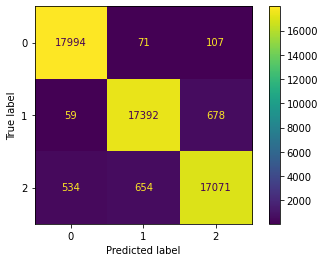

In [ ]:
print('\n',classification_report(y_pred,y_test))
plot_confusion_matrix(modelr,x_test,y_test);

In [ ]:
name.append('RandomForestClassifier')
score.append(modelr.score(x_test,y_test))

In [ ]:
text=["work okay"]
test=tfidf.transform(text)
label.inverse_transform(np.unique(data_df['N_sents']))[modelr.predict(test)]

array(['Neutral'], dtype=object)

## AdaBoostClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
modela=AdaBoostClassifier()
modela.fit(x_train,y_train)
y_pred=modela.predict(x_test)
accuracy_score(y_test,y_pred)

0.6596774193548387


               precision    recall  f1-score   support

           0       0.72      0.67      0.69     19680
           1       0.60      0.59      0.60     18377
           2       0.66      0.73      0.69     16503

    accuracy                           0.66     54560
   macro avg       0.66      0.66      0.66     54560
weighted avg       0.66      0.66      0.66     54560



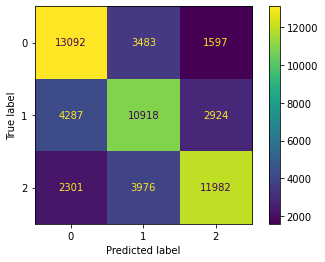

In [ ]:
print('\n',classification_report(y_pred,y_test))
plot_confusion_matrix(modela,x_test,y_test);

In [ ]:
name.append('AdaBoostClassifier')
score.append(modela.score(x_test,y_test))

In [ ]:
text=["work fine"]
test=tfidf.transform(text)
label.inverse_transform(np.unique(data_df['N_sents']))[modela.predict(test)]

array(['Neutral'], dtype=object)

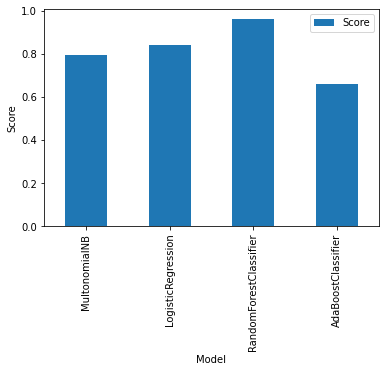

In [ ]:
pd.DataFrame({'Model':name,'Score':score},index=[1,2,3,4]).plot(kind='bar',x='Model',y='Score',ylabel='Score');

## HyperParameter Tunning

In [ ]:
modell.get_params().keys()

dict_keys(['estimator__C', 'estimator__class_weight', 'estimator__dual', 'estimator__fit_intercept', 'estimator__intercept_scaling', 'estimator__l1_ratio', 'estimator__max_iter', 'estimator__multi_class', 'estimator__n_jobs', 'estimator__penalty', 'estimator__random_state', 'estimator__solver', 'estimator__tol', 'estimator__verbose', 'estimator__warm_start', 'estimator', 'n_jobs'])

In [ ]:
from sklearn.model_selection import GridSearchCV

params={'estimator__penalty':['l1','l2'],'estimator__C':np.logspace(0,3,20)}

grid=GridSearchCV(modell,param_grid=params,n_jobs=-1)
grid.fit(x_train,y_train)

GridSearchCV(estimator=OneVsRestClassifier(estimator=LogisticRegression()),
             n_jobs=-1,
             param_grid={'estimator__C': array([1.00000000e+00, 1.93069773e+00, 3.72759372e+00, 7.19685673e+00,
       1.38949549e+01, 2.68269580e+01, 5.17947468e+01, 1.00000000e+02,
       1.93069773e+02, 3.72759372e+02, 7.19685673e+02, 1.38949549e+03,
       2.68269580e+03, 5.17947468e+03, 1.00000000e+04]),
                         'estimator__penalty': ['l1', 'l2']})

In [ ]:
grid.best_score_

0.875661783284454

In [ ]:
model_grid=grid.best_estimator_
model_grid

OneVsRestClassifier(estimator=LogisticRegression(C=51.7947467923121))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93     18862
           1       0.87      0.83      0.85     18992
           2       0.80      0.88      0.84     16706

    accuracy                           0.87     54560
   macro avg       0.87      0.87      0.87     54560
weighted avg       0.88      0.87      0.87     54560



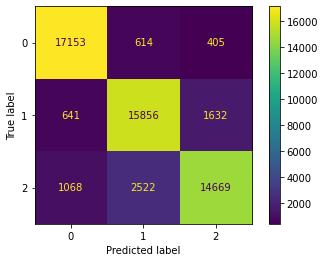

In [ ]:
y_pred=model_grid.predict(x_test)
print(classification_report(y_pred,y_test))
plot_confusion_matrix(model_grid,x_test,y_test);

In [ ]:
text=["work bad"]
test=tfidf.transform(text)
label.inverse_transform(np.unique(data_df['N_sents']))[model_grid.predict(test)]

array(['Negative'], dtype=object)

In [ ]:
name.append('Tuned Logistic')
score.append(model_grid.score(x_test,y_test))

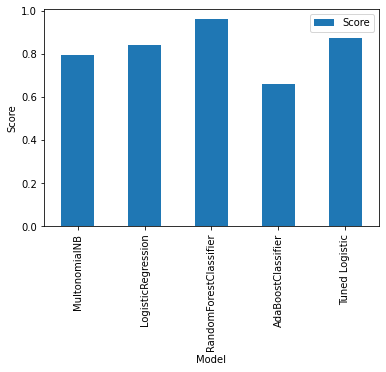

In [ ]:
pd.DataFrame({'Model':name,'Score':score},index=[1,2,3,4,5]).plot(kind='bar',x='Model',y='Score',ylabel='Score');

# Spacy vectorization

In [ ]:
data_df['N_sents'].value_counts()

2    60622
0     3974
1     3965
Name: N_sents, dtype: int64

In [ ]:
data_df['vector']=data_df['review'].apply(vector)
x=data_df['vector']
y=data_df['N_sents']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=12)
x_train_2d=np.stack(x_train)
x_test_2d=np.stack(x_test)
x_train_2d.shape

(47992, 300)

In [ ]:
from sklearn.utils import class_weight
class_weight = class_weight.compute_class_weight('balanced',classes=np.unique(y),y=y)
class_weight

array([5.75079685, 5.76385036, 0.37698635])

In [ ]:
len(data_df)

68561

In [ ]:
len(data_df)/(3*3965)

5.763850357292981

In [ ]:
len(data_df)/(3*3974)

5.75079684616675

In [ ]:
len(data_df)/(3*60622)

0.37698635258926905

## Logistic Regression 

In [ ]:
a=OneVsRestClassifier(LogisticRegression())
a.get_params().keys()

dict_keys(['estimator__C', 'estimator__class_weight', 'estimator__dual', 'estimator__fit_intercept', 'estimator__intercept_scaling', 'estimator__l1_ratio', 'estimator__max_iter', 'estimator__multi_class', 'estimator__n_jobs', 'estimator__penalty', 'estimator__random_state', 'estimator__solver', 'estimator__tol', 'estimator__verbose', 'estimator__warm_start', 'estimator', 'n_jobs'])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
pipe5=Pipeline([
    ('scaler',MinMaxScaler()),
     ('lr',LogisticRegression(multi_class='multinomial',class_weight={0:5.76,1:5.75,2:0.37}))])

In [ ]:
{0:5.76,1:5.75,2:0.37}

{0: 5.76, 1: 5.75, 2: 0.37}

In [ ]:
pipe5.fit(x_train_2d,y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('lr',
                 LogisticRegression(class_weight={0: 5.76, 1: 5.75, 2: 0.37},
                                    multi_class='multinomial'))])

In [ ]:
y_pred=pipe5.predict(x_test_2d)

accuracy_score(y_test,y_pred)

0.626039185181584

In [ ]:
print(classification_report(y_pred,y_test))
#plot_confusion_matrix(pipe5,x_test,y_test)

              precision    recall  f1-score   support

           0       0.72      0.23      0.35      3521
           1       0.49      0.11      0.18      5276
           2       0.63      0.98      0.76     11772

    accuracy                           0.63     20569
   macro avg       0.61      0.44      0.43     20569
weighted avg       0.61      0.63      0.54     20569



In [ ]:
text='works bad'
doc=nlp(text).vector
# do=np.stack(doc)
# pipe.predict(do)
doc=doc.reshape(-1,300)
pipe5.predict(doc)

array([0])

## RandomForestClassifier

In [ ]:
RandomForestClassifier().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [ ]:
pipe6=Pipeline([
    ('scaler',MinMaxScaler()),
     ('rf',RandomForestClassifier(class_weight={0:5.76,1:5.75,2:0.37}))])

In [ ]:
pipe6.fit(x_train_2d,y_train)
y_pred=pipe6.predict(x_test_2d)

accuracy_score(y_test,y_pred)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.08      0.73      0.14       124
           1       0.10      0.20      0.14       613
           2       0.97      0.89      0.93     19832

    accuracy                           0.87     20569
   macro avg       0.38      0.61      0.40     20569
weighted avg       0.94      0.87      0.90     20569



In [ ]:
text=' fine okay'
doc=nlp(text).vector
# do=np.stack(doc)
# pipe.predict(do)
doc=doc.reshape(-1,300)
pipe6.predict(doc)

array([2])

# Fasttext 

In [ ]:
! pip install fasttext
import fasttext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 KB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.10.3-py3-none-any.whl (222 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp38-cp38-linux_x86_64.whl size=3137819 sha256=e3bb1c3fc0f1257397d2b87631fd8685426c6aabd0c25f667838af2cfce1bcbe
  Stored in directory: /root/.cache/pip/wheels/93/61/2a/c54711a91c418ba06ba195b1d78ff24fcaad8592f2a694ac94
Successfully built fasttext


In [ ]:
from sklearn.model_selection import train_test_split
data_fast=data_df[['Sentiments','review']]
data_fast['sentiment'] = '__label__' + data_fast['Sentiments'].astype(str)
data_fast['sentiment_review'] = data_fast['sentiment'] + ' ' + data_fast['review']

train_df, test_df = train_test_split(data_fast, test_size=0.2)

train_df.to_csv("Train", columns=["sentiment_review"], index=False, header=False)
test_df.to_csv("Test", columns=["sentiment_review"], index=False, header=False)
data_fast.head()

,Sentiments,review,sentiment,sentiment_review
0,Positive,work purpose get mark great durable afforable ...,__label__Positive,__label__Positive work purpose get mark great ...
1,Positive,fast cutting good adheasive good paper,__label__Positive,__label__Positive fast cutting good adheasive ...
2,Positive,work great lapping bench like adhesive back wa...,__label__Positive,__label__Positive work great lapping bench lik...
3,Positive,stuff great adhesive place strip superior flat...,__label__Positive,__label__Positive stuff great adhesive place s...
4,Positive,small ot paper work porter cable profile sande...,__label__Positive,__label__Positive small ot paper work porter c...


In [ ]:
model = fasttext.train_supervised(input="Train",lr=0.2, epoch=20, wordNgrams=3)
test_num, precision, recall=model.test("Test")
f_score = (2*precision*recall)/(precision+recall)
print('No. of Test Samples:',test_num)
print('Precision Score:',precision)
print('Recall:',recall)
print('F1 score:',f_score)

No. of Test Samples: 13713
Precision Score: 0.9084810034274047
Recall: 0.9084810034274047
F1 score: 0.9084810034274047


In [ ]:
model.predict('half')

(('__label__Neutral',), array([0.97480035]))

In [ ]:
model.predict(' i am very disappointed with this product')

(('__label__Negative',), array([0.95262301]))

In [ ]:
model.predict(' The product worked really well')

(('__label__Positive',), array([0.94116461]))

In [ ]:
model.get_nearest_neighbors('disappointed')

[(0.9998007416725159, 'useless'),
 (0.9992910623550415, 'contact'),
 (0.9991982579231262, 'hear'),
 (0.9991537928581238, 'flimsy'),
 (0.9990776777267456, 'crooked'),
 (0.9990518093109131, 'poor'),
 (0.9989577531814575, 'overpriced'),
 (0.9988418221473694, 'wobble'),
 (0.9987480640411377, 'batch'),
 (0.9987272620201111, 'disappointing')]

In [ ]:
model.predict(' product is working ')

(('__label__Neutral',), array([0.95121175]))

### Analysis:-

In [ ]:
data1=pd.get_dummies(data_df['verified'])
data_df=pd.concat([data_df,data1],axis=1)

In [ ]:
data=pd.get_dummies(data_df['Sentiments'])
data_df=pd.concat([data_df,data],axis=1)

In [ ]:
data_df['Negative']=data_df['Negative'].replace(0,np.nan,regex=True)
data_df['Neutral']=data_df['Neutral'].replace(0,np.nan,regex=True)
data_df['Positive']=data_df['Positive'].replace(0,np.nan,regex=True)
data_df[0]=data_df[0].replace(0,np.nan,regex=True)
data_df[1]=data_df[1].replace(0,np.nan,regex=True)

### Product Analysis 

In [ ]:
cl1=data_df.groupby(['asin']).agg(
Total_Sold=(1,'count'),
Negative=('Negative','count'),
Neutral=('Neutral','count'),
Positive=('Positive','count'),
Price=('price','mean'),
Sales=('price','sum'),
Rank=('rank','median'),
Verified_True=(1,'count'),
Verified_False=(0,'count')
).reset_index()
cl1['Main_Cat']=cl1['asin'].apply(lambda x : data_df.loc[data_df['asin']==x,'main_cat'].unique()[0])


In [ ]:
cl1['Brand']=cl1['asin'].apply(lambda x : data_df.loc[data_df['asin']==x,'brand'].unique()[0])
cl1['Title']=cl1['asin'].apply(lambda x : data_df.loc[data_df['asin']==x,'title'].unique()[0])

In [ ]:
def product(Column='Total_Sold',sort=True,main_cat='Tools & Home Improvement',sold=20,visual='df'):
  if visual=='plot':
    cl1[(cl1['Main_Cat']==main_cat) & (cl1['Total_Sold'] >=sold) ].sort_values(by=[Column],ascending=sort).head().plot(x='asin',kind='bar',y=Column)
  else:
    display(cl1[(cl1['Main_Cat']==main_cat) & (cl1['Total_Sold'] >=sold) ].sort_values(by=[Column],ascending=sort))
interact(product,Column=[x for x in cl1.columns],sort=[True,False],main_cat=[y for y in data_df['main_cat'].unique()],sold=(1,500,10),visual=['plot','df'])  ;

interactive(children=(Dropdown(description='Column', index=1, options=('asin', 'Total_Sold', 'Negative', 'Neut…

### Customers Analysis

In [ ]:
cl2=data_df.groupby(['reviewerID']).agg(
Item_bought=(1,'count'),
Negative=('Negative','count'),
Neutral=('Neutral','count'),
Positive=('Positive','count'),
#Price=('price','mean'),
Amount=('price','sum'),
#Rank=('rank','median'),
Verified_True=(1,'count'),
Verified_False=(0,'count')
).reset_index()

def customer(Column='Item_bought',sort=True,Bought=20,visual='df'):
  if visual=='plot':
    cl2[ cl2['Item_bought'] >=Bought].sort_values(by=[Column],ascending=sort).head().plot(x='asin',kind='bar',y=Column)
  else:
    display(cl2[cl2['Item_bought'] >=Bought].sort_values(by=[Column],ascending=sort))
interact(customer,Column=[x for x in cl2.columns],sort=[True,False],sold=(1,500,10),visual=['plot','df'])  ;

interactive(children=(Dropdown(description='Column', index=1, options=('reviewerID', 'Item_bought', 'Negative'…

### Text Analysis

In [ ]:
d = pd.read_csv('Clean_data.csv')
data_d = d[['review','price','unixReviewTime','overall','summary','main_cat','brand','title']]
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
data_d.dropna(inplace=True)
data_d['Reviews'] = data_d['review'].apply(lambda words : ' '.join(word for word in words.split() if word not in STOP_WORDS ))
data_d['summary'] = data_d['summary'].apply(lambda words : ' '.join(word for word in words.split() if word not in STOP_WORDS ))
stop_words = d['brand'].apply(lambda x: re.findall('[a-zA-Z]+',x[:10]))
stop_words_user_define = []
for i in stop_words:
  for j in i:
    if j not in stop_words_user_define:
      stop_words_user_define.append(j)
    else:
      pass
unique_st_words = set(stop_words_user_define)
data_d['Reviews'] = data_d['review'].apply(lambda words : ' '.join(word for word in words.split() if word not in unique_st_words))
data_d.dropna(inplace=True)

In [ ]:
!pip install gensim
!pip install python-Levenshtein
! pip install wordcloud
import gensim
review_text = data_d['Reviews'].apply(gensim.utils.simple_preprocess)
model = gensim.models.Word2Vec(
    window=10,
    min_count = 2
)
model.build_vocab(review_text,progress_per = 100)
model.train(review_text, total_examples = model.corpus_count,epochs=model.epochs) 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.0/174.0 KB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 60.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


(6791076, 7612440)

In [ ]:
pos_df = data_d[data_d['overall']>3]
nt_df = data_d[data_d['overall']==3]
neg_df = data_d[data_d['overall']<3]

review_text1 = pos_df['summary'].apply(gensim.utils.simple_preprocess)
from collections import Counter
count1 = Counter()
for i in review_text1:
  for j in i:
    count1[j]+=1

review_text2 = nt_df['summary'].apply(gensim.utils.simple_preprocess)
from collections import Counter
count2 = Counter()
for i in review_text2:
  for j in i:
    count2[j]+=1

review_text3 = neg_df['summary'].apply(gensim.utils.simple_preprocess)
from collections import Counter
count3 = Counter()
for i in review_text3:
  for j in i:
    count3[j]+=1
post_lst = [i[0] for i in count1.most_common(1500)]
neu_lst = [i[0] for i in count2.most_common(1500)]
neg_lst = [i[0] for i in count3.most_common(1500)]
neg_word = []
for i in neg_lst:
  if i in (post_lst and neu_lst):
    pass
  else:
    neg_word.append(i)
pos_word = []
for i in post_lst:
  if i in (neg_lst and neu_lst):
    pass
  else:
    pos_word.append(i)
neu_word = []
for i in neu_lst:
  if i in (post_lst and neg_lst):
    pass
  else:
    neu_word.append(i)

### Word Cloud

In [ ]:
from wordcloud import WordCloud

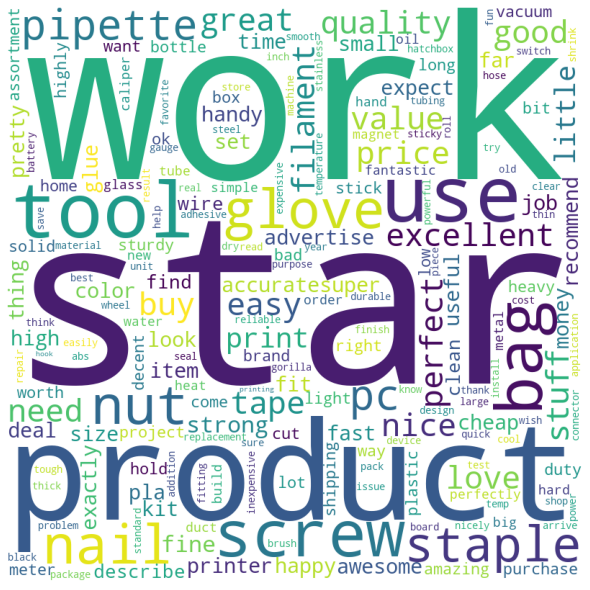

In [ ]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(' '.join(post_lst))
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

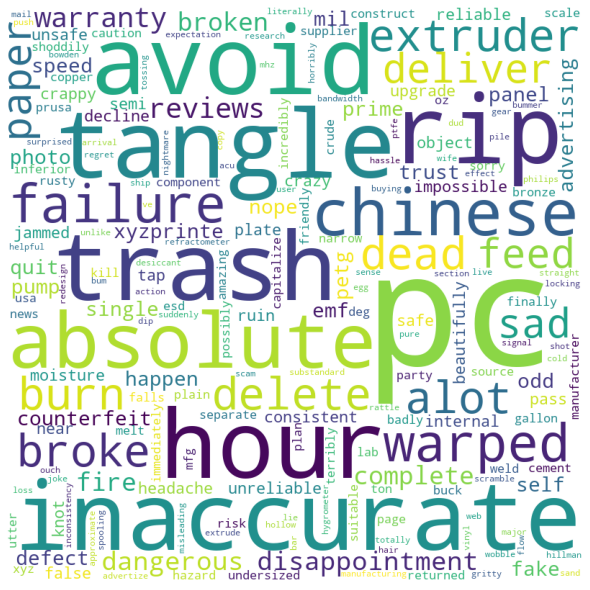

In [ ]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(' '.join(neg_word))
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

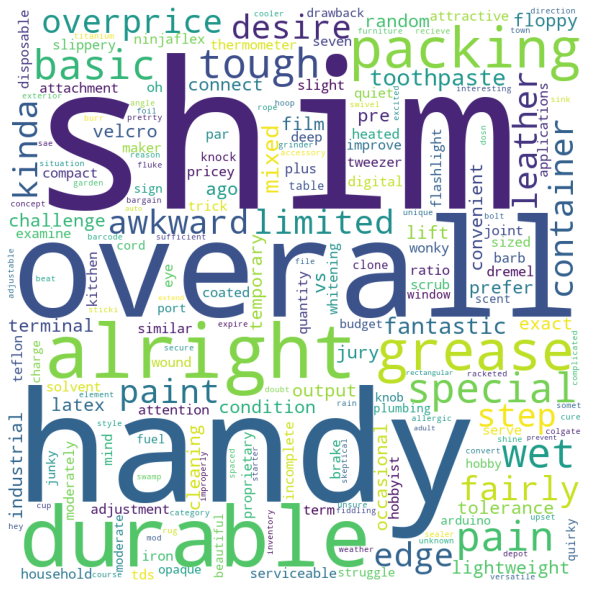

In [ ]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(' '.join(neu_word))
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# **Analyzing Text**

In [ ]:
def rew_analyzer(st):
  p = 0
  n=0
  nu=0
  for i in st.split():
    if i in pos_word:
      #print(i,'po')
      p+=1
    elif i in neg_word:
      n+=1
      #print(i,'ne')
    elif i in neu_word:
      nu+=1
      #print(i,'nu')
  if p>n and p>nu:
    return 'Positive Review'
  elif p==n and p==nu:
    return 'Positive Review'
  elif n>p and n>nu:
    return 'Negetive Review'
  elif p<n and n==nu:
    return 'Negative Review'
  elif nu>p and nu>n:
    return 'Neutral Review'
  elif p<n and p==nu:
    return 'Negative Review'
  else:
    return 'Neutral'
data_d['Reviews Text Analysis'] = data_d['Reviews'].apply(rew_analyzer)

In [ ]:
data_d["y_test"] = data_d['overall'].map({5:3,4:3,3:2,2:1,1:1})

In [ ]:
data_d['y_pred'] = data_d['Reviews Text Analysis'].map({'Positive Review':3
                       ,'Neutral Review':2
                       ,'Negetive Review':1})

In [ ]:
data_d.dropna(inplace=True)

In [ ]:
accuracy_score(data_d["y_test"],data_d["y_pred"])

# **Translator**

In [ ]:
! pip install textblob
from textblob import TextBlob


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def score(a):
  ans=str()
  if a<0.1:
    ans='Negative'
  elif a>0.1 and a<0.5:
    ans='Neutral'
  else:
    ans='Positive'
  return print('This is a {0} statement'.format(ans))      

In [ ]:
blob = TextBlob("This is a good product")
b=str(blob.translate(from_lang='en',to='fr'))
b

"C'est un bon produit"

In [ ]:
blob = TextBlob(b)
a=TextBlob(str(blob.translate(from_lang='fr',to='en')))

In [ ]:
score(a.sentiment.polarity)

This is a Positive statement


# **Product based classification**

In [ ]:
import statistics as st
mode = lambda x: st.mode(x)
cl=data_df.groupby(['asin']).agg(
Total_Sold=(1,'count'),
Negative=('Negative','count'),
Neutral=('Neutral','count'),
Positive=('Positive','count'),
Price=('price','mean'),
Sales=('price','sum'),
Rank=('rank','median'),
Verified_True=(1,'count'),
Verified_False=(0,'count'),
Rating=('overall',mode)
).reset_index()
display(cl.head(2))

,asin,Total_Sold,Negative,Neutral,Positive,Price,Sales,Rank,Verified_True,Verified_False,Rating
0,B0000223SI,12,0,0,13,15.99,207.87,19857.0,12,1,5
1,B0000223SK,20,0,1,21,17.99,395.78,13586.0,20,2,5


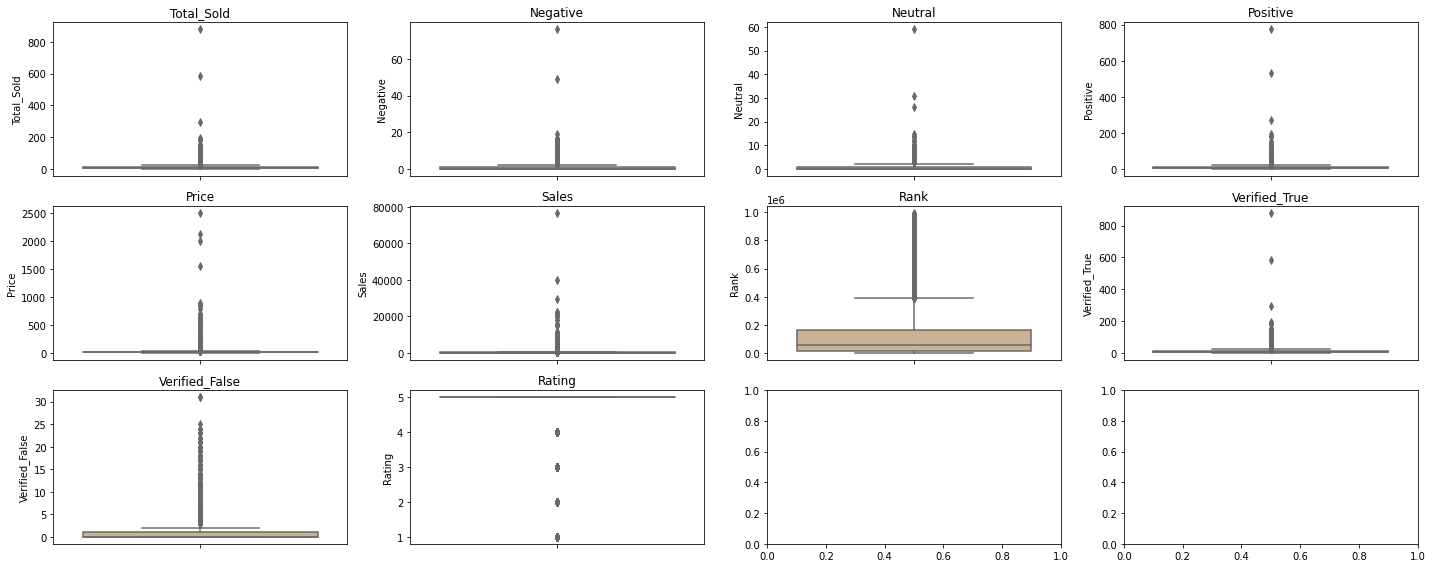

In [ ]:
numerics=['int16','int32','int64','float16','float32','float64'] #list of all numeric type in daataframe
con_df=cl.select_dtypes(include=numerics)# create dataframe for all numeric type
#con_df.drop('asin',axis=1,inplace=True)
con_cols=con_df.columns # taking colums 
num_cols=4  # how many column we want in subplot 
n_bins=20 # bin size for histogram 
num_rows=int(len(con_cols)/num_cols)+1   #rows for subplot

figs,axes =plt.subplots(num_rows,num_cols,tight_layout=True,figsize=(20,8))

for col ,ax in zip(con_cols,axes.flatten()):
    sns.boxplot(y=con_df[col],ax=ax,color='tan')
    ax.set_title(col)
plt.show()

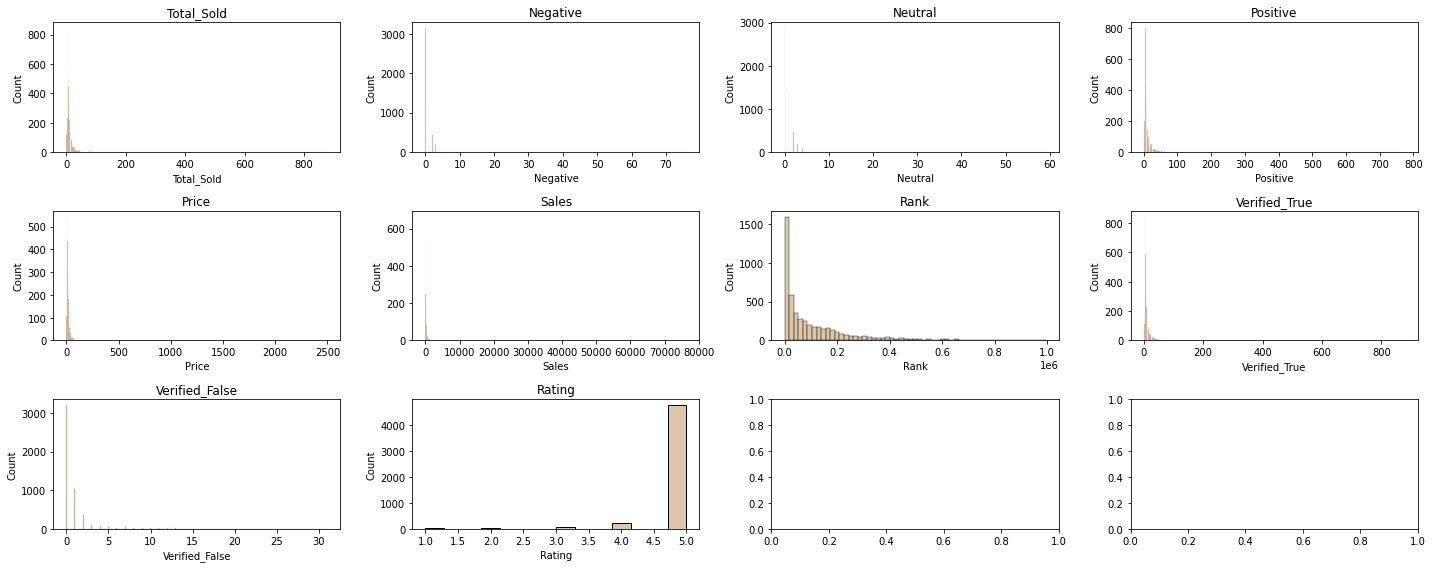

In [ ]:
numerics=['int16','int32','int64','float16','float32','float64'] #list of all numeric type in daataframe
con_df=cl.select_dtypes(include=numerics)# create dataframe for all numeric type
#con_df.drop('asin',axis=1,inplace=True)
con_cols=con_df.columns # taking colums 
num_cols=4  # how many column we want in subplot 
n_bins=20 # bin size for histogram 
num_rows=int(len(con_cols)/num_cols)+1   #rows for subplot

figs,axes =plt.subplots(num_rows,num_cols,tight_layout=True,figsize=(20,8))

for col ,ax in zip(con_cols,axes.flatten()):
    sns.histplot(x=con_df[col],ax=ax,color='tan')
    ax.set_title(col)
plt.show()

In [ ]:
cl.Rating.value_counts()

5    4760
4     240
3      60
1      28
2      17
Name: Rating, dtype: int64

In [ ]:
smote=SMOTE(sampling_strategy='auto')
X = cl.iloc[:,1:9]
y = cl.Rating
X_s, Y_s=smote.fit_resample(X,y)
x = pd.concat([X_s, Y_s],axis=1)
x.Rating.value_counts()

5    4760
4    4760
3    4760
1    4760
2    4760
Name: Rating, dtype: int64

In [ ]:
from sklearn.tree import DecisionTreeClassifier #model
from sklearn.metrics import confusion_matrix ,accuracy_score, recall_score,f1_score,precision_score #to get the score of classifier

In [ ]:
X_train,X_test,y_train, y_test= train_test_split(X_s, Y_s,train_size=0.7)
dt = DecisionTreeClassifier(random_state=1) # crating classifier 

In [ ]:
dt.fit(X_test,y_test) # fitting the train data

DecisionTreeClassifier(random_state=1)

In [ ]:
DT_pred= dt.predict(X_test) # predicting test data
DT_pred1= dt.predict(X_train) # predicting train data

In [ ]:
a_s = accuracy_score(y_train,DT_pred1) # gives the accuracy of model how well our classifier
r_s = recall_score(y_train,DT_pred1, average ='macro' ) #to get the recall score used predefined function 
p_s = precision_score(y_train,DT_pred1, average ='macro') #to get the precision_score used predefined function
f1_s = f1_score(y_train,DT_pred1, average ='macro') #to get the f1_score used predefined function
print('Accuracy is:' ,a_s)
print('Recall_score is:', r_s)
print('Precision_score is:', p_s)
print('F1_score is:' ,f1_s)

Accuracy is: 0.9084033613445378
Recall_score is: 0.9090126050864964
Precision_score is: 0.90888358279372
F1_score is: 0.9087026067408196


In [ ]:
a_s = accuracy_score(y_test,DT_pred) # gives the accuracy of model how well our classifier
r_s = recall_score(y_test,DT_pred, average ='macro' ) #to get the recall score used predefined function 
p_s = precision_score(y_test,DT_pred, average ='macro') #to get the precision_score used predefined function
f1_s = f1_score(y_test,DT_pred, average ='macro') #to get the f1_score used predefined function
print('Accuracy is:' ,a_s)
print('Recall_score is:', r_s)
print('Precision_score is:', p_s)
print('F1_score is:' ,f1_s)

Accuracy is: 1.0
Recall_score is: 1.0
Precision_score is: 1.0
F1_score is: 1.0


# **Search Recommendation**

In [ ]:
ans=pd.DataFrame(index=range(len(data_df)))
a=str(input('Enter the word :')).lower()
ans['index']=data_df['description'].apply(lambda x : re.findall(a,x)[0] if len(re.findall(a,x))!=0 else np.nan)
ans.dropna(inplace=True)
ans1=data_df.loc[ans.index,:]
def recoomendation(column='Price',sort=True,n=5):
    a=ans1.loc[ans1['overall']>3,:]
    cl3=a.groupby('asin').agg(
    Total_Review=(1,'count'),
    Rating=('overall','mean'),
    # Negative=('Negative','count'),
    # Neutral=('Neutral','count'),
    # Positive=('Positive','count'),
    Price=('price','mean')
    ).reset_index()
    cl3['brand']=cl3['asin'].apply(lambda x:a.loc[a['asin']==x,'brand'].unique()[0])
    if len(cl3)==0:
        print('Thanks for searching , please look for another product')
    else:
      display(cl3.sort_values(by=column,ascending=sort).head(n))
interact(recoomendation,column=[i for i in cl3.columns],sort=[True,False],n=(1,50,1))  ;  